## MULTIPLE LINEAR REGRESSION

### Assignment Task:

##### Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [74]:
df=pd.read_csv("ToyotaCorolla - MLR.csv")

In [75]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [76]:
df.shape

(1436, 11)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


### Tasks:

##### 1) Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre-process the data to apply the MLR.

In [78]:

df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [79]:

df.duplicated().sum()

1

In [80]:
df.drop_duplicates(ignore_index=True,inplace=True)

In [81]:
df.duplicated().sum()

0

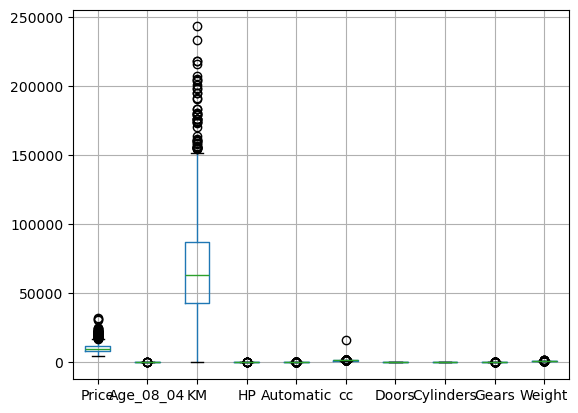

In [82]:

df.boxplot()
plt.show()

In [83]:

def outlier_capping(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR= Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

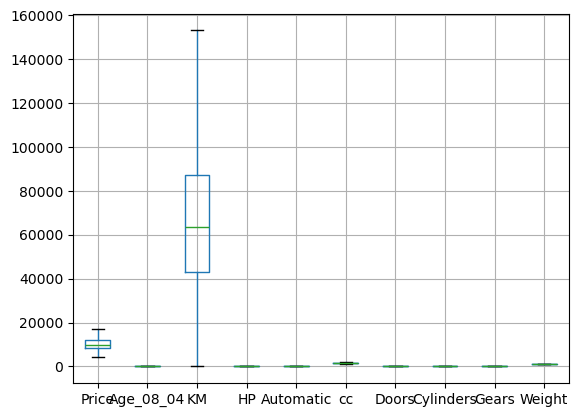

In [84]:
df.boxplot()
plt.show()

In [85]:
df= df.drop(columns=['Cylinders'])
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500.0,23.0,46986.0,Diesel,90.0,0.0,1900.0,3,5.0,1152.5
1,13750.0,23.0,72937.0,Diesel,90.0,0.0,1900.0,3,5.0,1152.5
2,13950.0,24.0,41711.0,Diesel,90.0,0.0,1900.0,3,5.0,1152.5
3,14950.0,26.0,48000.0,Diesel,90.0,0.0,1900.0,3,5.0,1152.5
4,13750.0,30.0,38500.0,Diesel,90.0,0.0,1900.0,3,5.0,1152.5


In [86]:
df.shape

(1435, 10)

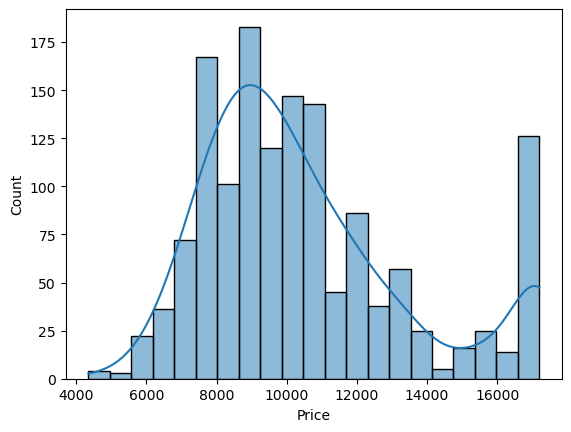

In [87]:
sns.histplot(data=df['Price'],kde=True)
plt.show()

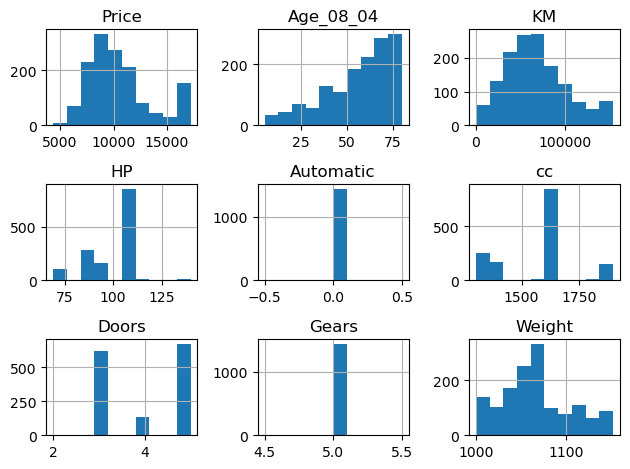

In [88]:

df.hist()
plt.tight_layout()
plt.show()


In [89]:

df.describe(include='all')

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435,1435.000000,1435.0,1435.000000,1435.000000,1435.0,1435.000000
unique,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Petrol,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1264,NaN,NaN,NaN,NaN,NaN,NaN
mean,10495.964460,55.992334,67644.520383,NaN,101.093380,0.0,1558.327526,4.032753,5.0,1068.520906
std,2977.598549,18.529725,34725.393258,NaN,13.146145,0.0,168.788311,0.952667,0.0,37.722708
min,4350.000000,5.000000,1.000000,NaN,69.000000,0.0,1300.000000,2.000000,5.0,1000.000000
25%,8450.000000,44.000000,43000.000000,NaN,90.000000,0.0,1400.000000,3.000000,5.0,1040.000000
50%,9900.000000,61.000000,63451.000000,NaN,110.000000,0.0,1600.000000,4.000000,5.0,1070.000000
75%,11950.000000,70.000000,87041.500000,NaN,110.000000,0.0,1600.000000,5.000000,5.0,1085.000000


In [90]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500.0,23.0,46986.0,Diesel,90.0,0.0,1900.0,3,5.0,1152.5
1,13750.0,23.0,72937.0,Diesel,90.0,0.0,1900.0,3,5.0,1152.5
2,13950.0,24.0,41711.0,Diesel,90.0,0.0,1900.0,3,5.0,1152.5
3,14950.0,26.0,48000.0,Diesel,90.0,0.0,1900.0,3,5.0,1152.5
4,13750.0,30.0,38500.0,Diesel,90.0,0.0,1900.0,3,5.0,1152.5


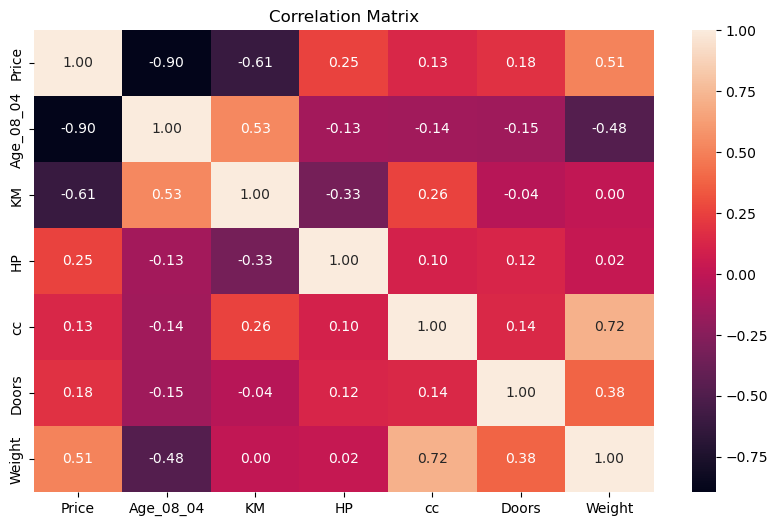

In [91]:
numerical_cols=['Price','Age_08_04','KM','HP','cc','Doors','Weight']
plt.figure(figsize=(10,6))
sns.heatmap(df[numerical_cols].corr(),annot=True,fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [92]:
## One hot encoding

In [93]:
cat=df[['Fuel_Type']]
encoder=OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')

In [94]:
ohe=encoder.fit_transform(cat)

In [95]:
ohe

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [96]:
new_column_names = encoder.get_feature_names_out(['Fuel_Type'])
new_column_names

array(['Fuel_Type_Diesel', 'Fuel_Type_Petrol'], dtype=object)

In [97]:
ohe_df = pd.DataFrame(ohe, columns=new_column_names)

In [98]:
df_temp = df.drop('Fuel_Type', axis=1)

In [99]:
df = pd.concat([df_temp, ohe_df], axis=1)

In [100]:
df.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500.0,23.0,46986.0,90.0,0.0,1900.0,3,5.0,1152.5,1.0,0.0
1,13750.0,23.0,72937.0,90.0,0.0,1900.0,3,5.0,1152.5,1.0,0.0
2,13950.0,24.0,41711.0,90.0,0.0,1900.0,3,5.0,1152.5,1.0,0.0
3,14950.0,26.0,48000.0,90.0,0.0,1900.0,3,5.0,1152.5,1.0,0.0
4,13750.0,30.0,38500.0,90.0,0.0,1900.0,3,5.0,1152.5,1.0,0.0


In [101]:
df[new_column_names].dtypes

Fuel_Type_Diesel    float64
Fuel_Type_Petrol    float64
dtype: object

In [102]:
### feature_selection
from sklearn.feature_selection import f_regression


In [103]:
target=df[['Price']]
features=df.drop(columns=(['Price']))

In [104]:
f_reg=f_regression(features,target)

In [105]:
features.columns

Index(['Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Gears', 'Weight',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol'],
      dtype='object')

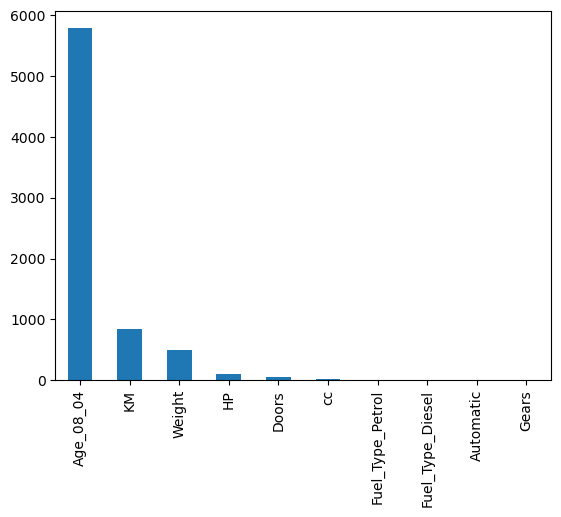

In [106]:
pd.Series(f_reg[0],index=features.columns).sort_values(ascending=False).plot(kind='bar')
plt.show()

In [107]:
### Checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [108]:
features.values

array([[2.3000e+01, 4.6986e+04, 9.0000e+01, ..., 1.1525e+03, 1.0000e+00,
        0.0000e+00],
       [2.3000e+01, 7.2937e+04, 9.0000e+01, ..., 1.1525e+03, 1.0000e+00,
        0.0000e+00],
       [2.4000e+01, 4.1711e+04, 9.0000e+01, ..., 1.1525e+03, 1.0000e+00,
        0.0000e+00],
       ...,
       [7.1000e+01, 1.7016e+04, 8.6000e+01, ..., 1.0150e+03, 0.0000e+00,
        1.0000e+00],
       [7.0000e+01, 1.6916e+04, 8.6000e+01, ..., 1.0150e+03, 0.0000e+00,
        1.0000e+00],
       [7.6000e+01, 1.0000e+00, 1.1000e+02, ..., 1.1140e+03, 0.0000e+00,
        1.0000e+00]])

In [109]:
vif=pd.DataFrame()

In [110]:
vif['features']= features.columns
vif['VIF']= [variance_inflation_factor(features.values,i) for i in range(len(features.columns))]

In [111]:
vif.sort_values(by='VIF',ascending=False)

,features,VIF
6,Gears,2591.136762
8,Fuel_Type_Diesel,26.769346
4,cc,12.807789
2,HP,10.104386
9,Fuel_Type_Petrol,9.692439
7,Weight,3.853438
0,Age_08_04,2.181306
1,KM,2.015390
5,Doors,1.302842
3,Automatic,NaN


In [112]:
features.drop(columns=['Automatic'],inplace=True)

In [113]:
features.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23.0,46986.0,90.0,1900.0,3,5.0,1152.5,1.0,0.0
1,23.0,72937.0,90.0,1900.0,3,5.0,1152.5,1.0,0.0
2,24.0,41711.0,90.0,1900.0,3,5.0,1152.5,1.0,0.0
3,26.0,48000.0,90.0,1900.0,3,5.0,1152.5,1.0,0.0
4,30.0,38500.0,90.0,1900.0,3,5.0,1152.5,1.0,0.0


##### 2) Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [114]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1148, 9)
(287, 9)
(1148, 1)
(287, 1)


In [115]:
x_train.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
108,20.0,7187.0,110.0,1600.0,3,5.0,1105.0,0.0,1.0
1279,78.0,73638.0,86.0,1300.0,4,5.0,1015.0,0.0,1.0
857,62.0,64797.0,110.0,1600.0,5,5.0,1075.0,0.0,1.0
902,65.0,59000.0,110.0,1600.0,5,5.0,1075.0,0.0,1.0
372,33.0,16512.0,97.0,1400.0,5,5.0,1085.0,0.0,1.0


In [116]:
std_sca=StandardScaler()
x_train[['Age_08_04','KM','HP','cc','Weight']]=std_sca.fit_transform(x_train[['Age_08_04','KM','HP','cc','Weight']])

In [117]:
x_train.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
108,-1.940533,-1.748188,0.689004,0.255237,3,5.0,0.954608,0.0,1.0
1279,1.182405,0.176456,-1.123604,-1.492799,4,5.0,-1.387370,0.0,1.0
857,0.320905,-0.079609,0.689004,0.255237,5,5.0,0.173948,0.0,1.0
902,0.482436,-0.247509,0.689004,0.255237,5,5.0,0.173948,0.0,1.0
372,-1.240564,-1.478104,-0.292825,-0.910121,5,5.0,0.434168,0.0,1.0


In [118]:
x_test[['Age_08_04','KM','HP','cc','Weight']]=std_sca.fit_transform(x_test[['Age_08_04','KM','HP','cc','Weight']])

In [119]:
x_test.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
57,-1.626291,-0.706386,-0.390378,-1.067253,5,5.0,1.172663,0.0,1.0
1002,0.338264,-0.819226,0.633164,0.212015,5,5.0,0.163159,0.0,1.0
360,-1.135152,-1.242067,-0.390378,-1.067253,3,5.0,-1.278991,0.0,1.0
903,0.283693,-0.255024,0.633164,0.212015,5,5.0,0.018944,0.0,1.0
1276,1.265971,0.170751,0.633164,0.212015,5,5.0,0.163159,0.0,1.0


##### 3) Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build a minimum of 3 different models.
##### 4) Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [120]:
### model1 ( Linear Regression)
lin_model=LinearRegression()
lin_model.fit(x_train,y_train)

LinearRegression()

In [121]:
### Coefficients
lin_model.coef_

array([[-1.95781108e+03, -5.14522676e+02,  3.56248078e+02,
        -4.35498008e+02, -9.09815382e+01,  7.95807864e-13,
         9.83101007e+02,  1.01820572e+03,  1.09777152e+03]])

In [122]:
lin_model.intercept_

array([9779.22608881])

In [123]:
### Training Validation
y_pred=lin_model.predict(x_train)
r2_score(y_train,y_pred)

0.8691098922833208

In [124]:
### Testing Validation
y_pred1=lin_model.predict(x_test)
r2_score(y_test,y_pred1)

0.847122744999453

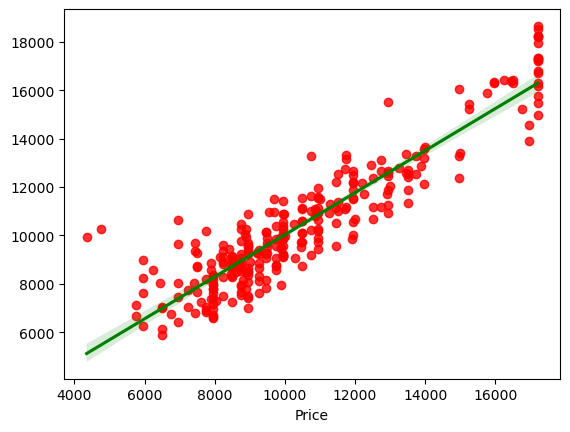

In [125]:
sns.regplot(x=y_test,y=y_pred1,scatter_kws={'color':'red'},line_kws={'color':'green'})
plt.show()

In [126]:
### model 2 (Decision Tree Regressor)
from sklearn.tree import DecisionTreeRegressor

In [127]:
dec_tree=DecisionTreeRegressor(criterion='squared_error',splitter='best',max_depth=5) # splitter ='random' also there
dec_tree.fit(x_train,y_train)
y_pred=dec_tree.predict(x_test)
r2_score(y_test,y_pred)

0.8468122821638908

In [128]:
### model 3 ( RandomForest Regressor)
from sklearn.ensemble import RandomForestRegressor

In [129]:
rand_for=RandomForestRegressor(n_estimators=150,bootstrap=True,max_features='sqrt',max_samples=0.9,random_state=50)

In [130]:
rand_for.fit(x_train,y_train)
y_pred1=rand_for.predict(x_test)
r2_score(y_test,y_pred1)

0.8687844762754138

##### 5) Apply Lasso and Ridge methods on the model.

In [131]:
from sklearn.linear_model import Lasso,Ridge

In [132]:
#### Lasso
lasso=Lasso()

In [133]:
lasso.fit(x_train,y_train)

Lasso()

In [134]:
y_pred=lasso.predict(x_train)
y_pred

array([16390.18539018,  6986.12892018, 10141.49870789, ...,
       12578.4269588 , 15194.29882052,  9885.68656248])

In [135]:
r2_score(y_train,y_pred)

0.8690274936933273

In [136]:
y_pred1=lasso.predict(x_test)
y_pred1

array([15429.63815909, 10481.50677392, 12530.24165301, 10153.89692611,
        8144.974958  ,  9107.65277269, 13148.01299463,  7490.57057265,
       12685.3556638 ,  8640.11846103, 12545.93114554,  7770.70550413,
       11171.80777355,  6108.07782394, 16731.23217655,  8240.77196614,
       13133.31766992, 15494.25147711, 16426.42261815,  9150.83722447,
       11738.58363934,  9973.06638266, 10598.22956258, 11462.168442  ,
        8336.60165257,  8550.03831122,  9536.93002965,  8512.36254854,
        9235.18256358,  8048.26565076,  9160.7841844 , 11109.58898293,
        7011.24166448, 18243.15094086,  9256.34790264,  9224.99792526,
        7025.52621934,  8708.47187592, 13397.31371801, 10011.30052612,
        7759.57508092,  7986.66059585,  9249.35588562, 13306.34487827,
        8730.25839625,  9277.10902292, 12058.75061101,  7378.17298616,
       10514.02176099, 11992.11297233,  9723.2834419 , 12573.25319525,
       12205.57788341, 13681.97412378, 16174.39743248, 10668.58002392,
      

In [137]:
r2_score(y_test,y_pred1)

0.8466027858223867

In [138]:
##### Ridge
ridge=Ridge()

In [139]:
ridge.fit(x_train,y_train)

Ridge()

In [140]:
y_pred=ridge.predict(x_train)
y_pred

array([[16382.35443528],
       [ 6990.89269713],
       [10140.73882353],
       ...,
       [12580.4362091 ],
       [15197.57579709],
       [ 9885.4047599 ]])

In [141]:
r2_score(y_train,y_pred)

0.8690756003739672

In [142]:
y_pred1=ridge.predict(x_test)
y_pred1

array([[15434.96595769],
       [10480.04058375],
       [12531.34106319],
       [10152.1239815 ],
       [ 8148.64456379],
       [ 9110.83260516],
       [13140.14660406],
       [ 7479.42103552],
       [12679.17202861],
       [ 8643.96731114],
       [12538.83605594],
       [ 7778.51725125],
       [11169.4312226 ],
       [ 6118.12859946],
       [16715.30394755],
       [ 8242.7927385 ],
       [13136.22891919],
       [15500.85061794],
       [16430.66299145],
       [ 9151.0137479 ],
       [11731.48798597],
       [ 9973.34455804],
       [10603.85899533],
       [11434.23458688],
       [ 8338.60229242],
       [ 8555.37310773],
       [ 9536.04695949],
       [ 8537.14551369],
       [ 9234.75136405],
       [ 8050.67098669],
       [ 9163.27563334],
       [11100.28391113],
       [ 7019.6170507 ],
       [18232.57409646],
       [ 9255.9812907 ],
       [ 9224.58197735],
       [ 7026.40805755],
       [ 8692.74841224],
       [13388.68886467],
       [10005.40033893],


In [143]:
r2_score(y_test,y_pred1)

0.8467700633680737

### Interview Questions:

##### 1) What is Normalization & Standardization and how is it helpful?

##### 2) What techniques can be used to address multicollinearity in multiple linear regression?